<a href="https://colab.research.google.com/github/pjenkin/pjTensorFlowTut/blob/main/PJ_convolutional_NN_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is for convolutional neural networks, for detecting patterns, using Conv2D layers.

From https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb

Start by downloading the dataset and inspecting

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zipfile_reference = zipfile.ZipFile("pizza_steak.zip","r")
zipfile_reference.extractall()
zipfile_reference.close()

--2024-11-20 08:45:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   108MB/s    in 1.0s    

2024-11-20 08:45:57 (108 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# view downloaded dataset folder contents
!ls

pizza_steak  pizza_steak.zip  pizza_steak.zip.1  sample_data


In [ ]:
# look in pizza_steak folder
!ls pizza_steak

test  train


In [ ]:
# look in pizza_steak/train folder
!ls pizza_steak/train

pizza  steak


In [ ]:
# look in pizza_steak/train/pizza folder
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
# look in pizza_steak/test folder
!ls pizza_steak/test

pizza  steak


In [ ]:
# look in pizza_steak/test/pizza folder
!ls pizza_steak/test/pizza

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [ ]:
# but how many files in which folders?
# walk through and list them using Python
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in path {dirpath}")


There are 2 directories and 0 files in path pizza_steak
There are 2 directories and 0 files in path pizza_steak/test
There are 0 directories and 250 files in path pizza_steak/test/pizza
There are 0 directories and 250 files in path pizza_steak/test/steak
There are 2 directories and 0 files in path pizza_steak/train
There are 0 directories and 750 files in path pizza_steak/train/pizza
There are 0 directories and 750 files in path pizza_steak/train/steak


i.e. dataset has a 3:1 training/test split (not 80/20 or 4:1).

In [ ]:
# or, a more direct way in Python:
pizza_num_pizza_train_files = len(os.listdir("pizza_steak/train/pizza"))


print(pizza_num_pizza_train_files)

750


In [ ]:
# get the class names, assuming 1 directory per class, and dataset train and test having same classes/directories
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # glob all directories
print(class_names)

['pizza' 'steak']


Now view an image from the dataset.
Format is .jpg as seen above from ls results.

In [ ]:
# function to return a randomly selected image from a folder

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # target_dir is parent folder, target_class is sub-folder
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)  # return 1 item from list (image filename from desired images folder)

  # Read in the image and plot using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')   # show no axis decorations

  print(f"Image shape: {img.shape}")
  #print(img)  # TEMPORARY! TO SEE DATA

  return img

Image shape: (512, 512, 3)


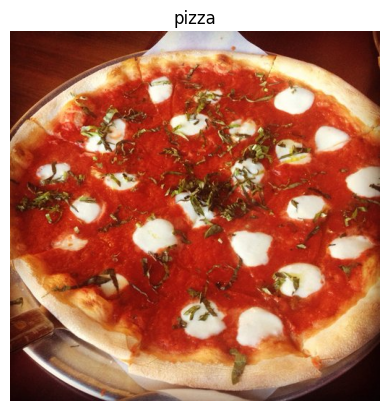

In [ ]:
# code to put a random image on screen
image = view_random_image(target_dir="pizza_steak/train",
                          target_class="pizza")

In [ ]:
print("image data: ", image)
print("image shape: ", image.shape)

image data:  [[[55 14  8]
  [53 12  6]
  [51 10  4]
  ...
  [58 15  8]
  [55 18  9]
  [51 17  7]]

 [[57 16 10]
  [56 15  9]
  [55 14  8]
  ...
  [59 16  9]
  [55 18  9]
  [52 18  8]]

 [[56 15  9]
  [57 16 10]
  [57 16 10]
  ...
  [59 16  9]
  [55 18  9]
  [52 18  8]]

 ...

 [[24  5  7]
  [23  4  6]
  [22  3  5]
  ...
  [ 9  3  3]
  [ 9  3  3]
  [ 8  2  2]]

 [[23  4  6]
  [22  3  5]
  [21  2  4]
  ...
  [ 9  3  3]
  [ 9  3  3]
  [ 8  2  2]]

 [[23  4  6]
  [22  3  5]
  [20  1  3]
  ...
  [ 9  3  3]
  [ 9  3  3]
  [ 8  2  2]]]
image shape:  (512, 512, 3)


So this image data is a 512x512x3, for RGB (colour channels, 0-255).




In [ ]:
# normalised to 0..1
print(image/255)

[[[0.21568627 0.05490196 0.03137255]
  [0.20784314 0.04705882 0.02352941]
  [0.2        0.03921569 0.01568627]
  ...
  [0.22745098 0.05882353 0.03137255]
  [0.21568627 0.07058824 0.03529412]
  [0.2        0.06666667 0.02745098]]

 [[0.22352941 0.0627451  0.03921569]
  [0.21960784 0.05882353 0.03529412]
  [0.21568627 0.05490196 0.03137255]
  ...
  [0.23137255 0.0627451  0.03529412]
  [0.21568627 0.07058824 0.03529412]
  [0.20392157 0.07058824 0.03137255]]

 [[0.21960784 0.05882353 0.03529412]
  [0.22352941 0.0627451  0.03921569]
  [0.22352941 0.0627451  0.03921569]
  ...
  [0.23137255 0.0627451  0.03529412]
  [0.21568627 0.07058824 0.03529412]
  [0.20392157 0.07058824 0.03137255]]

 ...

 [[0.09411765 0.01960784 0.02745098]
  [0.09019608 0.01568627 0.02352941]
  [0.08627451 0.01176471 0.01960784]
  ...
  [0.03529412 0.01176471 0.01176471]
  [0.03529412 0.01176471 0.01176471]
  [0.03137255 0.00784314 0.00784314]]

 [[0.09019608 0.01568627 0.02352941]
  [0.08627451 0.01176471 0.01960784]


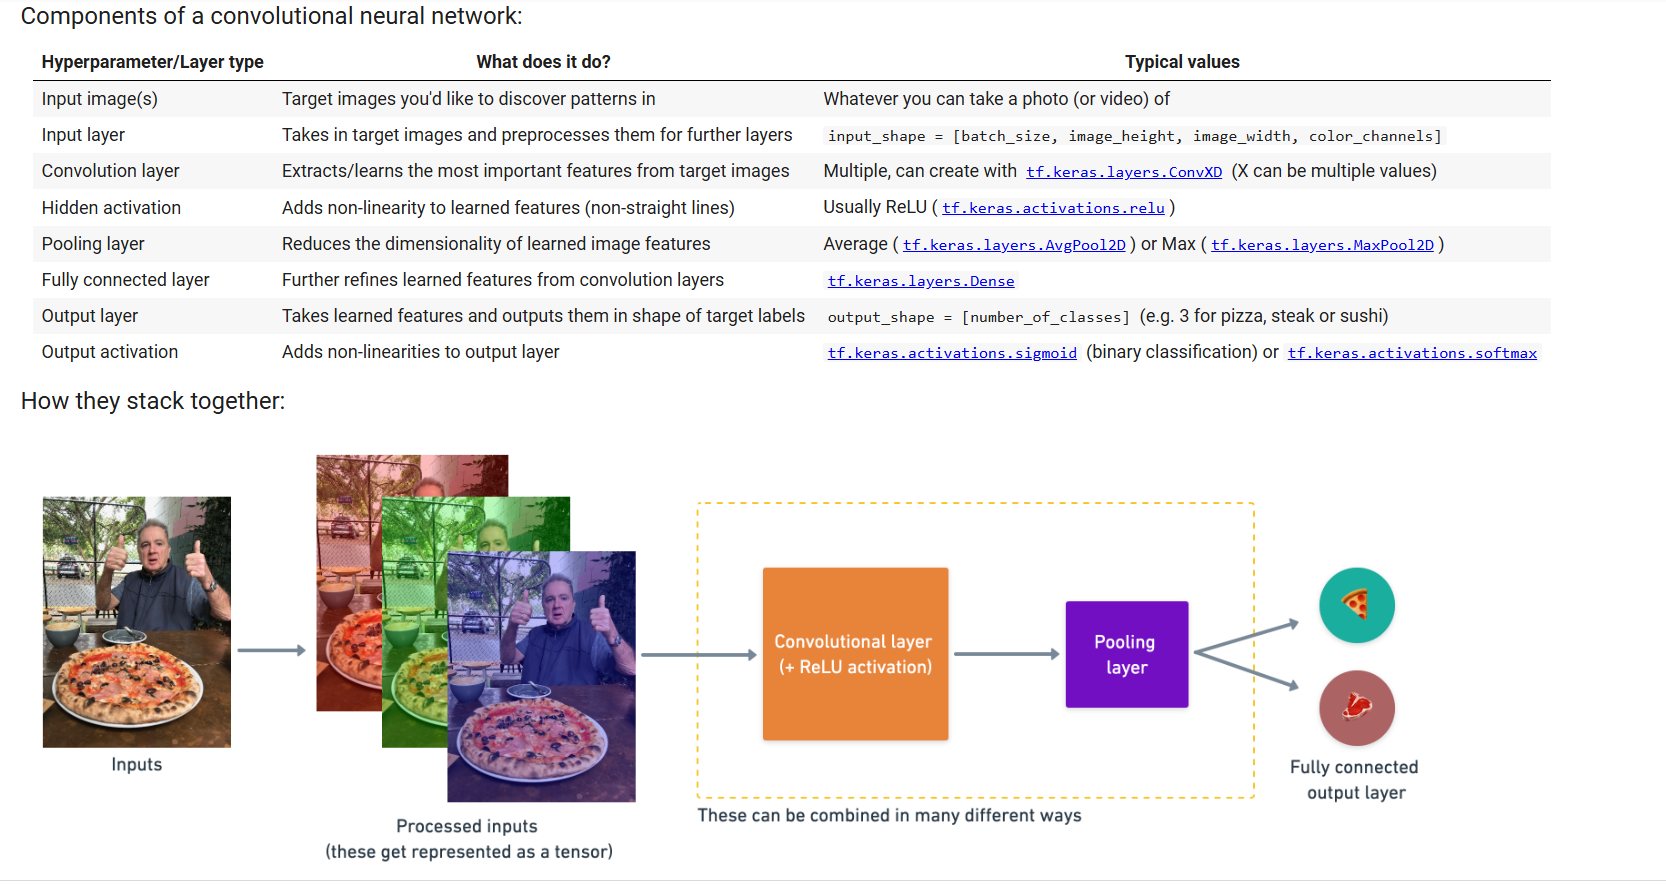

Now try coding a convolutional CNN model



Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

v good explanation: [https://poloclub.github.io/cnn-explainer/](https://poloclub.github.io/cnn-explainer/)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# COPY/PASTED AS QUITE COMPLEX
# https://stackoverflow.com/q/78602883/11365317 ?
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=67)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=67)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16) # TRY THIS - number of training samples used to perform 1 step of SGD loss optimisation - default 32 may cause a warning, maybe use fewer

                # https://stackoverflow.com/a/78852179/11365317

# this was (in tutorial) copying above CNN demonstrator architecture/pattern, but performing only binary classification
# the classification was of dots (pixels?) not whole images (to do next)

model_1.summary()

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 324ms/step - loss: 0.5374 - accuracy: 0.7240 - val_loss: 0.3820 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 15s 317ms/step - loss: 0.4215 - accuracy: 0.8073 - val_loss: 0.3831 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 15s 316ms/step - loss: 0.4103 - accuracy: 0.8200 - val_loss: 0.3365 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 15s 316ms/step - loss: 0.3571 - accuracy: 0.8507 - val_loss: 0.3329 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 15s 318ms/step - loss: 0.3479 - accuracy: 0.8553 - val_loss: 0.2893 - val_accuracy: 0.8980
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      

In [ ]:
# COPY/PASTED AS QUITE COMPLEX
# https://stackoverflow.com/q/78602883/11365317 ?
# https://pyimagesearch.com/2021/06/14/a-gentle-introduction-to-tf-data-with-tensorflow/
# https://www.tensorflow.org/tutorials/load_data/images
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=67)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=67)


import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zipfile_reference = zipfile.ZipFile("pizza_steak.zip","r")
zipfile_reference.extractall()
zipfile_reference.close()

import numpy as np
import tensorflow as tf
#!ls pizza_steak/train/pizza
train_data_dir="pizza_steak/train/"
test_data_dir="pizza_steak/test/"
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 512
img_width = 512

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size
)


"""
target_class = 'pizza'

# train_ds.filter(lambda img, label: label == "pizza")
train_pizza_ds = train_ds.map(lambda x,y : (x[y==0], y[y==0]))
# what does map do? let alone the lambda function

test_pizza_ds = test_ds.map(lambda x,y : (x[y==0], y[y==0]))

for img, lbl in pizza_ds.take(3):
  print("Image shape: ", img.numpy().shape)
  print("Label: ", lbl.numpy())

# https://stackoverflow.com/a/73511780/11365317


#train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY))
# train_dataset = tf.data.Dataset.from_tensor_slices((train_pizza_ds[:,0], train_pizza_ds[:,1]))
# wait, do i need to do tf.data.Dataset.from_tensor_slices here? are they already there as a (mapped) dataset perhaps?
# ... and did i even need to separate out the pizza from the steak, or could i have left them both in there???
"""


# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1_data = tf.keras.models.Sequential([
  # tf.keras.layers.Flatten(),
  #tf.keras.Input(shape=(512,512,3)),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         #input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
                         input_shape=(512, 512, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),  # try not flatten() for dataset
  tf.keras.layers.Flatten(),     # try not flatten() for dataset
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1_data.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_data = model_1_data.fit(#train_data,
                        train_ds,
                        epochs=5,
                        #batch_size=16,  # batch_size default 32, used for both training and testing
                        #steps_per_epoch=len(train_data) * 2,
                        steps_per_epoch=len(train_ds),
                        #validation_data=valid_data,
                        validation_data=test_ds,
                        validation_steps=len(test_ds))
                        #validation_steps=len(test_ds)) * 2
                        #validation_batch_size=16) # TRY THIS - number of training samples used to perform 1 step of SGD loss optimisation - default 32 may cause a warning, maybe use fewer


                # https://stackoverflow.com/a/78852179/11365317

                # https://stackoverflow.com/q/79096702/11365317 skipping even epoohs

# this was (in tutorial) copying above CNN demonstrator architecture/pattern, but performing only binary classification
# the classification was of dots (pixels?) not whole images (to do next)

model_1_data.summary()
plot_CNN_loss_curves(history_1_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
--2024-11-20 19:14:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   181MB/s    in 0.6s    

2024-11-20 19:14:29 (181 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Image shape:  (32, 512, 512, 3)
Label:  [1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1]
Image shape:  (32, 512, 512, 3)
Label:  [0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1]
Image shape:  (32, 512, 512, 3)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/47 ━━━━━━━━━━━━━━━━━━━━ 11:27 15s/step - accuracy: 0.4688 - loss: 3.1880

KeyboardInterrupt: 

In [ ]:
# COPY/PASTED AS QUITE COMPLEX
# https://stackoverflow.com/q/78602883/11365317 ?
# https://pyimagesearch.com/2021/06/14/a-gentle-introduction-to-tf-data-with-tensorflow/
# https://www.tensorflow.org/tutorials/load_data/images
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=67)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=67)


import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zipfile_reference = zipfile.ZipFile("pizza_steak.zip","r")
zipfile_reference.extractall()
zipfile_reference.close()

import numpy as np
import tensorflow as tf
#!ls pizza_steak/train/pizza
train_data_dir="pizza_steak/train/"
test_data_dir="pizza_steak/test/"
#batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 512
img_width = 512

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

print(train_ds.class_names)

"""
target_class = 'pizza'

# train_ds.filter(lambda img, label: label == "pizza")
train_pizza_ds = train_ds.map(lambda x,y : (x[y==0], y[y==0]))
# what does map do? let alone the lambda function

test_pizza_ds = test_ds.map(lambda x,y : (x[y==0], y[y==0]))

for img, lbl in pizza_ds.take(3):
  print("Image shape: ", img.numpy().shape)
  print("Label: ", lbl.numpy())

# https://stackoverflow.com/a/73511780/11365317


#train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY))
# train_dataset = tf.data.Dataset.from_tensor_slices((train_pizza_ds[:,0], train_pizza_ds[:,1]))
# wait, do i need to do tf.data.Dataset.from_tensor_slices here? are they already there as a (mapped) dataset perhaps?
# ... and did i even need to separate out the pizza from the steak, or could i have left them both in there???
"""


# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1b_data = tf.keras.models.Sequential([
  # tf.keras.layers.Flatten(),
  #tf.keras.Input(shape=(512,512,3)),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         #input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
                         input_shape=(512, 512, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),  # try not flatten() for dataset
  tf.keras.layers.Flatten(),     # try not flatten() for dataset
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1b_data.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1b_data = model_1b_data.fit(#train_data,
                        train_ds,
                        epochs=5,
                        #batch_size=16,  # batch_size default 32, used for both training and testing
                        #steps_per_epoch=len(train_data) * 2,
                        steps_per_epoch=len(train_ds),
                        #validation_data=valid_data,
                        validation_data=test_ds,
                        validation_steps=len(test_ds))
                        #validation_steps=len(test_ds)) * 2
                        #validation_batch_size=16) # TRY THIS - number of training samples used to perform 1 step of SGD loss optimisation - default 32 may cause a warning, maybe use fewer


                # https://stackoverflow.com/a/78852179/11365317

                # https://stackoverflow.com/q/79096702/11365317 skipping even epochs

# this was (in tutorial) copying above CNN demonstrator architecture/pattern, but performing only binary classification
# the classification was of dots (pixels?) not whole images (to do next)

model_1b_data.summary()
plot_CNN_loss_curves(history_1b_data)

In [ ]:

def plot_CNN_loss_curves(model_fit_return):

  """
  Return loss curves, separately, for training and for validation metrics
  history:  a return from a model.fit
  """

  import matplotlib.pyplot as plt

  loss = model_fit_return.history["loss"]
  val_loss = model_fit_return.history["val_loss"]

  accuracy = model_fit_return.history["accuracy"]
  val_accuracy = model_fit_return.history["val_accuracy"]

  epochs = range(len(model_fit_return.history["loss"]))

  # now plot the loss (using matplotlib.pyplot as plt)
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="validation loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # now also plot accuracy, separately
  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(8,6))

# now plot the losses
plot_CNN_loss_curves(history_1)

Now try classifying on the image rather than on dots (?) (still binary cross-entropy)

Work on image
reshape image

In [ ]:
# try replacing deprecated ImageDataGenerator by tf.data https://pyimagesearch.com/2021/06/14/a-gentle-introduction-to-tf-data-with-tensorflow/


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

#dataset = tf.data.Dataset.from_tensor_slices(())

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_2 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(                        # now flattened - last dimension of input to dense layers should match shape of nput unit
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),   # ReLU layer substituted
      tf.keras.layers.Dense(1, activation="sigmoid")
      ])
"""
  # model 1's code
tf.keras.layers.Conv2D(filters=10,
                      kernel_size=3, # can also be (3, 3)
                      activation="relu",
                      input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                          padding="valid"), # padding can also be 'same'
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
"""


# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16)

model_2.summary()

30k trainable parameters in model_1 vs 600k trainable parameters in model_2.

Accuracy at 50%, with the non-convolutional layers only in model_2, is poor at 50% (i.e. same as guessing).

Try increasing the numbers of neurons (aka increasing the *complexity*) from 4 to 100 in each of the hidden, Dense layers


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_3 = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(                        # now flattened - last dimension of input to dense layers should match shape of nput unit
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
      tf.keras.layers.Dense(100, activation="relu"),  # neuron from 4 to 100 (more complex) in model_3
      tf.keras.layers.Dense(100, activation="relu"),  # also another layer added in model_3
      tf.keras.layers.Dense(100, activation="relu"),   # ReLU layer substituted
      tf.keras.layers.Dense(1, activation="sigmoid")
      ])
"""
  # model 1's code
tf.keras.layers.Conv2D(filters=10,
                      kernel_size=3, # can also be (3, 3)
                      activation="relu",
                      input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                          padding="valid"), # padding can also be 'same'
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
"""


# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16)

model_3.summary()

Accuracy is increased by adding a extra layer and more neurons (4->100) in each layer.

Trainable prameters in model_3 amount to 15M (vs 60K in model_2 and 15K in model_1)

But this accuracy @73% is not as good as that of the CNN in model_1 (83%) with only 4 neurons.

In [ ]:
# https://pyimagesearch.com/2021/06/14/a-gentle-introduction-to-tf-data-with-tensorflow/
# could use tf.data instead of ImageDataGenerator as this is deprecated (and slower?)

# Try implementing a cut-down version of the CNN demonstrator model at https://poloclub.github.io/cnn-explainer/

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation="relu",
           input_shape=(224,224,3)), # input layer with shape (not-flatten'd) specified x*y*RGB
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # 2 hidden Conv2D layers with relu and 10 filters with kernl_size 3
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification NN to have sigmoid output layer

])
"""
  model_3's code
      tf.keras.layers.Flatten(                        # now flattened - last dimension of input to dense layers should match shape of nput unit
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
      tf.keras.layers.Dense(100, activation="relu"),  # neuron from 4 to 100 (more complex) in model_3
      tf.keras.layers.Dense(100, activation="relu"),  # also another layer added in model_3
      tf.keras.layers.Dense(100, activation="relu"),   # ReLU layer substituted
      tf.keras.layers.Dense(1, activation="sigmoid")
"""

"""
  # model 1's code
tf.keras.layers.Conv2D(filters=10,
                      kernel_size=3, # can also be (3, 3)
                      activation="relu",
                      input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                          padding="valid"), # padding can also be 'same'
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
"""


# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16)

model_4.summary()




In [ ]:
plot_CNN_loss_curves(history_4)

Slightly different loss curves (using bespoke function) than seen in tutorial.

Ideally, curves should be aligned, validation slightly under training curve. Any large gap would probably be indicating overfitting.

Generally tactic is to
* identify a baseline accuracy target to exceed
* increase overfitting to data until this accuracy is exceeded
* reduce overfitting (and complexity or other design?) so as to generalise adequately

Techniques for complexity increase:
* increase number of convolutional layers
* increase number of convolutional filters
* additional dense layer to output of flattened layer

CNN designs for reduction of overfitting:
* ConvNet (CNN) with max pooling (i.e. a MaxPool2D layer, after each convolutional layer)
* ConvNet (CNN) with max pooling and data augmentation

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 302ms/step - loss: 0.6210 - accuracy: 0.6413 - val_loss: 0.4591 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 14s 293ms/step - loss: 0.4621 - accuracy: 0.7860 - val_loss: 0.3947 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 14s 294ms/step - loss: 0.4255 - accuracy: 0.8120 - val_loss: 0.3617 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 14s 291ms/step - loss: 0.3990 - accuracy: 0.8300 - val_loss: 0.3457 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 14s 295ms/step - loss: 0.3752 - accuracy: 0.8327 - val_loss: 0.3277 - val_accuracy: 0.8540
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)    

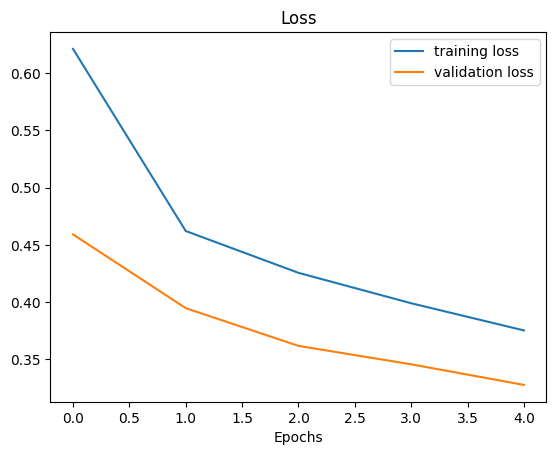

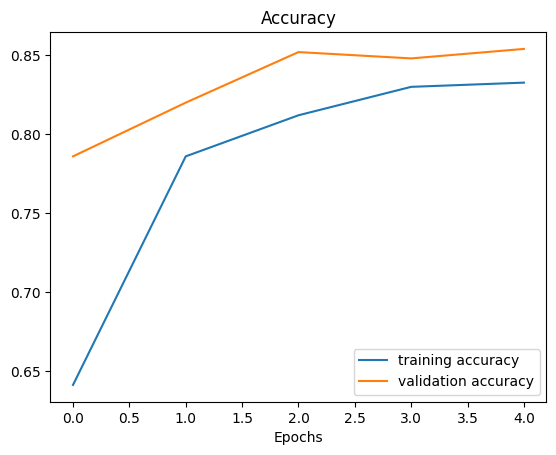

In [ ]:
# TODO https://pyimagesearch.com/2021/06/14/a-gentle-introduction-to-tf-data-with-tensorflow/
# could use tf.data instead of ImageDataGenerator as this is deprecated (and slower?)

# Try implementing a cut-down version of the CNN demonstrator model at https://poloclub.github.io/cnn-explainer/

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation="relu",
           input_shape=(224,224,3)), # input layer with shape (not-flatten'd) specified x*y*RGB
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),  # MaxPool after every Conv2D
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # 2 hidden Conv2D layers with relu and 10 filters with kernl_size 3
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification NN to have sigmoid output layer

])
"""
  model_3's code
      tf.keras.layers.Flatten(                        # now flattened - last dimension of input to dense layers should match shape of nput unit
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
      tf.keras.layers.Dense(100, activation="relu"),  # neuron from 4 to 100 (more complex) in model_3
      tf.keras.layers.Dense(100, activation="relu"),  # also another layer added in model_3
      tf.keras.layers.Dense(100, activation="relu"),   # ReLU layer substituted
      tf.keras.layers.Dense(1, activation="sigmoid")
"""

"""
  # model 1's code
tf.keras.layers.Conv2D(filters=10,
                      kernel_size=3, # can also be (3, 3)
                      activation="relu",
                      input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                          padding="valid"), # padding can also be 'same'
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
"""


# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16)

model_5.summary()
plot_CNN_loss_curves(model_5.history)




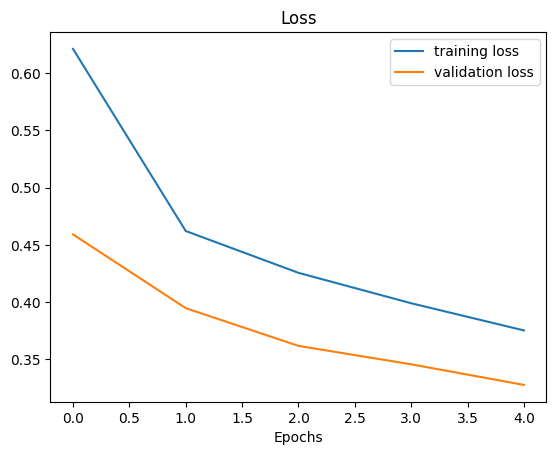

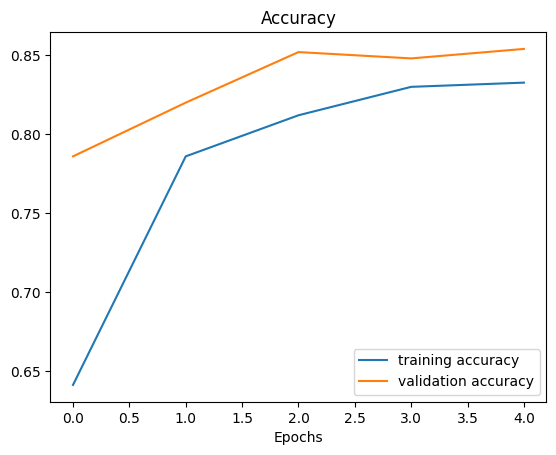

In [ ]:
plot_CNN_loss_curves(model_5.history)

Possible overfitting (too close to training, thus failing on test) where validation loss is increasing (not really happening above, but nvmd).

Data augmentation can reduce overfitting.

https://www.tensorflow.org/tutorials/images/data_augmentation



In [ ]:
trainAug = tf.keras.Sequential([
	tf.keras.layers.Rescaling(scale=1.0 / 255),
	tf.keras.layers.RandomFlip("horizontal_and_vertical"),
	tf.keras.layers.RandomZoom(
		height_factor=(-0.05, -0.15),
		width_factor=(-0.05, -0.15)),
	tf.keras.layers.RandomRotation(0.3)
])
# from https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/

In [ ]:
# from https://www.tensorflow.org/tutorials/images/data_augmentation#data_augmentation_2

import tensorflow as tf


def reduce_dimension(x, y):
  return tf.squeeze(x, axis=0)

#ds = train_ds.map(reduce_dimension)
#print('After reducing dimension: ', ds.element_spec)
# https://stackoverflow.com/a/71137696/11365317

def reduce_dimension_again(x, y):
  return tf.squeeze(x, axis=0)



resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(img_height, img_width),
  tf.keras.layers.Rescaling(1./255)
])  # is this actually used?


AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    #ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
    ds = ds.map(lambda x, y: (trainAug(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# https://www.tensorflow.org/tutorials/images/data_augmentation
# https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/
# augment either (i) by mapped Sequential function or (ii) by tf.image operations
# https://www.datacamp.com/tutorial/complete-guide-data-augmentation?dc_referrer=https%3A%2F%2Fwww.rdocumentation.org%2F&utm_source=r-docs&utm_medium=docs&utm_term=isd&utm_content=run_example_in_datalab


"""
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zipfile_reference = zipfile.ZipFile("pizza_steak.zip","r")
zipfile_reference.extractall()
zipfile_reference.close()
"""

train_data_dir="pizza_steak/train/"
test_data_dir="pizza_steak/test/"
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 512
img_width = 512

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  #batch_size=batch_size
)

print("train_ds (start): ", train_ds.element_spec)
# first dimension is batch size, then width, height, RGB

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

# TODO https://pyimagesearch.com/2021/06/14/a-gentle-introduction-to-tf-data-with-tensorflow/
# could use tf.data instead of ImageDataGenerator as this is deprecated (and slower?)

# Try implementing a cut-down version of the CNN demonstrator model at https://poloclub.github.io/cnn-explainer/

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(67)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

"""
# Import data from directories and turn it into batches
# not using, as from ImageDataGen
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
"""
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation="relu",
           input_shape=(224,224,3)), # input layer with shape (not-flatten'd) specified x*y*RGB
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),  # MaxPool after every Conv2D
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # 2 hidden Conv2D layers with relu and 10 filters with kernl_size 3
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification NN to have sigmoid output layer

])



# Don't know why this is TypeError: 'bool' object is not callable
#train_data = tf.data.Dataset.from_tensor_slices((trainX, trainLabels))
"""
train_ds_aug = (train_ds
	.shuffle(batch_size * 100)
	.batch(batch_size)
	.map(lambda x, y: (trainAug(x), y),   # use the .map
		 num_parallel_calls=tf.data.AUTOTUNE)
	.prefetch(tf.data.AUTOTUNE)
)
# the above adapted from the top of https://pyimagesearch.com/2021/06/28/data-augmentation-with-tf-data-and-tensorflow/
"""
# cf the dimension-reducing map code elsewhere reduce_dimension from https://stackoverflow.com/q/69701365/11365317

print("train_ds: ",train_ds.element_spec)

ds = train_ds.map(reduce_dimension)

print("ds: ",ds.element_spec)
# the below is a lambda-avoiding fudge and hybrid of the above with one in https://www.tensorflow.org/tutorials/images/data_augmentation#data_augmentation_2
# not sure if this will work
train_ds_aug = (ds
	.shuffle(batch_size)
	.batch(batch_size)
	.map(trainAug, num_parallel_calls=AUTOTUNE)
  .prefetch(tf.data.AUTOTUNE)
)

print("train_ds_aug: ",train_ds_aug.element_spec)
"""
aug_ds = train_ds.map(
  lambda x, y: (resize_and_rescale(x, training=True), y))
# This 1-liner might be a bit abrupt so use 'prepare' function instead?
"""

"""
  model_3's code
      tf.keras.layers.Flatten(                        # now flattened - last dimension of input to dense layers should match shape of nput unit
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
      tf.keras.layers.Dense(100, activation="relu"),  # neuron from 4 to 100 (more complex) in model_3
      tf.keras.layers.Dense(100, activation="relu"),  # also another layer added in model_3
      tf.keras.layers.Dense(100, activation="relu"),   # ReLU layer substituted
      tf.keras.layers.Dense(1, activation="sigmoid")
"""

"""
  # model 1's code
tf.keras.layers.Conv2D(filters=10,
                      kernel_size=3, # can also be (3, 3)
                      activation="relu",
                      input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                          padding="valid"), # padding can also be 'same'
tf.keras.layers.Conv2D(10, 3, activation="relu"),
tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
tf.keras.layers.MaxPool2D(2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
"""


# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# do the data augmentation (new for model_6!)
#augment_data = prepare(train_data, shuffle=True, augment=True)


# reduce again to take off first 'Non' dimension for some reason (leaving 512x512x3)
train_ds_aug_2 = train_ds_aug.map(reduce_dimension_again)

# Fit the model
#history_6 = model_6.fit(train_data,
history_6 = model_6.fit(train_ds_aug,   # try with augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16)

model_6.summary()
plot_CNN_loss_curves(history_6.history)






Found 1500 files belonging to 2 classes.
train_ds (start):  (TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Found 500 files belonging to 2 classes.
train_ds:  (TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
ds:  TensorSpec(shape=(512, 512, 3), dtype=tf.float32, name=None)
train_ds_aug:  TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None)


TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.tf__reduce_dimension_again() missing 1 required positional argument: 'y'


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Set the seed
tf.random.set_seed(67)

train_data_dir="pizza_steak/train/"
test_data_dir="pizza_steak/test/"
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 512
img_width = 512

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

image_data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.1),
  RandomZoom(0.2)])

def augment_images(image, label): # cos Dataset will have cussed labels dimension/rank as well as 4 dims of height width RGB and number
  augmented_image = image_data_augmentation(image)  # do stuff on the image part only
  return augmented_image, label # return both image (altered) and label

# https://chatgpt.com/share/673cabe4-4804-8013-b9d3-15f59ab60fdb
augmented_train_ds = train_ds.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
# hmmm - map the augmentation function to the dataset (i.e. applies the function to each element in the Dataset)

# Now prefetch for performance
augmented_train_ds = augmented_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# overlaps processing with training

for images, labels in train_ds.take(1):
  print ("train images.shape", images.shape)
  print ("labels.shape", labels.shape)

for images, labels in augmented_train_ds.take(1):
  print ("augmented_train_ds images.shape", images.shape)
  print ("labels.shape", labels.shape)



# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation="relu",
           input_shape=(512,512,3)), # input layer with shape (not-flatten'd) specified x*y*RGB
    tf.keras.layers.MaxPool2D(),  # MaxPool after every Conv2D
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # 2 hidden Conv2D layers with relu and 10 filters with kernl_size 3
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification NN to have sigmoid output layer

])

# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# do the data augmentation (new for model_6!)
#augment_data = prepare(train_data, shuffle=True, augment=True)



# Fit the model
#history_6 = model_6.fit(train_data,
history_6 = model_6.fit(augmented_train_ds,   # try with augmented data
                        epochs=5,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16)

model_6.summary()
plot_CNN_loss_curves(history_6)


Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
train images.shape (32, 512, 512, 3)
labels.shape (32,)
augmented_train_ds images.shape (32, 512, 512, 3)
labels.shape (32,)
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 377s 8s/step - accuracy: 0.5516 - loss: 38.1189 - val_accuracy: 0.6220 - val_loss: 0.8793
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 665ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6220 - val_loss: 0.8793
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 407s 8s/step - accuracy: 0.5875 - loss: 0.8452 - val_accuracy: 0.5860 - val_loss: 0.7877
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 874ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5860 - val_loss: 0.7877
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 402s 8s/step - accuracy: 0.5729 - loss: 0.7742 - val_accuracy: 0.6140 - val_loss: 0.7407


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 510, 510, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 255, 255, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 253, 253, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 126, 126, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 124, 124, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 62, 62, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 38440)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │          38,441 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,625 (475.10 KB)

 Trainable params: 40,541 (158.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,084 (316.74 KB)

AttributeError: 'dict' object has no attribute 'history'

In [ ]:
# just some setup code, no model running

import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Set the seed
tf.random.set_seed(67)

train_data_dir="pizza_steak/train/"
test_data_dir="pizza_steak/test/"
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 512
img_width = 512

train_ds_shuffle = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True  #shuffle is new for model_7
)

test_ds_shuffle = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True  #shuffle is new for model_7
)

image_data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.1),
  RandomZoom(0.2)])

def augment_images(image, label): # cos Dataset will have cussed labels dimension/rank as well as 4 dims of height width RGB and number
  augmented_image = image_data_augmentation(image)  # do stuff on the image part only
  return augmented_image, label # return both image (altered) and label

# https://chatgpt.com/share/673cabe4-4804-8013-b9d3-15f59ab60fdb
augmented_train_ds_shuffle = train_ds_shuffle.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
# hmmm - map the augmentation function to the dataset (i.e. applies the function to each element in the Dataset)

# Now prefetch for performance
augmented_train_ds_shuffle = augmented_train_ds_shuffle.prefetch(buffer_size=tf.data.AUTOTUNE)
# overlaps processing with training

for images, labels in train_ds_shuffle.take(1):
  print ("train images.shape", images.shape)
  print ("labels.shape", labels.shape)

for images, labels in augmented_train_ds_shuffle.take(1):
  print ("augmented_train_ds images.shape", images.shape)
  print ("labels.shape", labels.shape)


Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
train images.shape (32, 512, 512, 3)
labels.shape (32,)
augmented_train_ds images.shape (32, 512, 512, 3)
labels.shape (32,)


Accuracy 0.57 on epoch 5
Data augmentation, with no shuffle

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
train images.shape (32, 512, 512, 3)
labels.shape (32,)
augmented_train_ds images.shape (32, 512, 512, 3)
labels.shape (32,)
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 374s 8s/step - accuracy: 0.5419 - loss: 83.0011 - val_accuracy: 0.6860 - val_loss: 3.0956
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 32s 673ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6860 - val_loss: 3.0956
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 377s 8s/step - accuracy: 0.6659 - loss: 1.8817 - val_accuracy: 0.6580 - val_loss: 1.0534
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 872ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6580 - val_loss: 1.0534
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 373s 8s/step - accuracy: 0.6696 - loss: 0.8532 - val_accuracy: 0.6280 - val_loss: 0.9024


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 510, 510, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 255, 255, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 253, 253, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 126, 126, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 124, 124, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 62, 62, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 38440)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │          38,441 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,625 (475.10 KB)

 Trainable params: 40,541 (158.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,084 (316.74 KB)

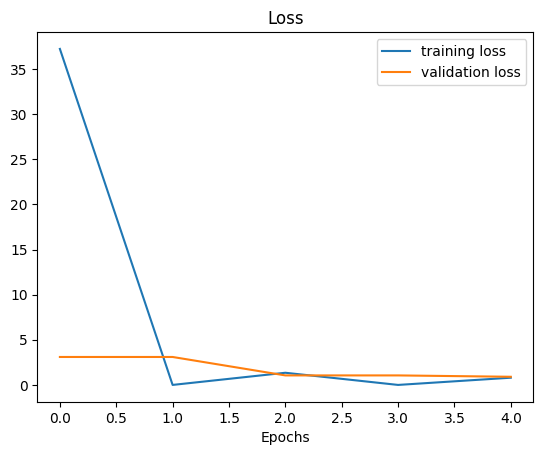

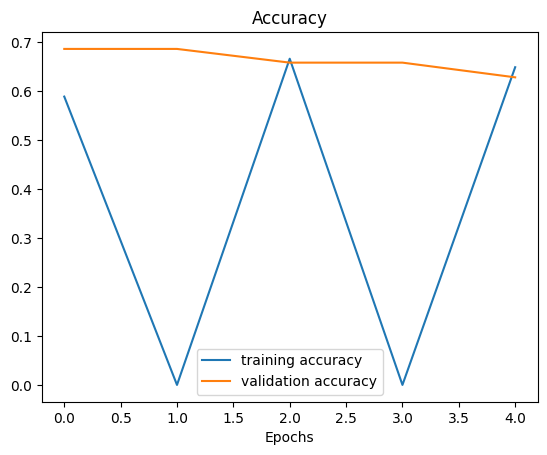

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Set the seed
tf.random.set_seed(67)

train_data_dir="pizza_steak/train/"
test_data_dir="pizza_steak/test/"
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 512
img_width = 512

train_ds_shuffle = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True  #shuffle is new for model_7
)

test_ds_shuffle = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True  #shuffle is new for model_7
)

image_data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.1),
  RandomZoom(0.2)])

def augment_images(image, label): # cos Dataset will have cussed labels dimension/rank as well as 4 dims of height width RGB and number
  augmented_image = image_data_augmentation(image)  # do stuff on the image part only
  return augmented_image, label # return both image (altered) and label

# https://chatgpt.com/share/673cabe4-4804-8013-b9d3-15f59ab60fdb
augmented_train_ds_shuffle = train_ds_shuffle.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
# hmmm - map the augmentation function to the dataset (i.e. applies the function to each element in the Dataset)

# Now prefetch for performance
augmented_train_ds_shuffle = augmented_train_ds_shuffle.prefetch(buffer_size=tf.data.AUTOTUNE)
# overlaps processing with training

for images, labels in train_ds_shuffle.take(1):
  print ("train images.shape", images.shape)
  print ("labels.shape", labels.shape)

for images, labels in augmented_train_ds_shuffle.take(1):
  print ("augmented_train_ds images.shape", images.shape)
  print ("labels.shape", labels.shape)



# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation="relu",
           input_shape=(512,512,3)), # input layer with shape (not-flatten'd) specified x*y*RGB
    tf.keras.layers.MaxPool2D(),  # MaxPool after every Conv2D
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # 2 hidden Conv2D layers with relu and 10 filters with kernl_size 3
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary classification NN to have sigmoid output layer

])

# Compile the model
model_7.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# do the data augmentation (new for model_6!)
#augment_data = prepare(train_data, shuffle=True, augment=True)



# Fit the model

history_7 = model_7.fit(augmented_train_ds_shuffle,   # try with augmented data
                        epochs=5,
                        steps_per_epoch=len(train_ds_shuffle),
                        validation_data=test_ds_shuffle,
                        #validation_steps=len(valid_data))
                        validation_batch_size=16)

model_7.summary()
plot_CNN_loss_curves(history_7)


Accuracy 0.69 at epoch 5 and steadily increasing, with both data augmentation AND shuffle (in the dataset NB not using ImageDataGenerator)

So pays to use shuffle.


In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(512, 512, 3)), # same input shape as our images
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_ds_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_ds_shuffle),
                        validation_data=test_ds_shuffle,
                        validation_steps=len(test_ds_shuffle))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 579s 12s/step - accuracy: 0.5389 - loss: 23.9591 - val_accuracy: 0.7020 - val_loss: 0.5951
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 494ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 587s 12s/step - accuracy: 0.7459 - loss: 0.5486 - val_accuracy: 0.7400 - val_loss: 0.5312
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 524ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 598s 12s/step - accuracy: 0.8556 - loss: 0.3958 - val_accuracy: 0.7320 - val_loss: 0.5312


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 510, 510, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 508, 508, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 254, 254, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 252, 252, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 250, 250, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 125, 125, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 156250)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │         156,251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,785 (1.82 MB)

 Trainable params: 159,261 (622.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 318,524 (1.22 MB)

ValueError: x and y must have same first dimension, but have shapes (5,) and (3,)

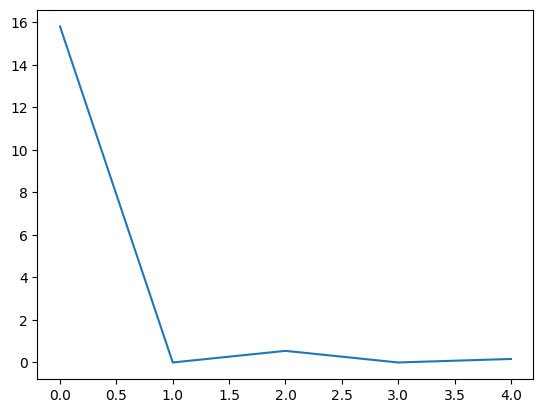

In [ ]:
model_8.summary()
plot_CNN_loss_curves(history_8)


Accuracy for model_8 0.93 by epoch 5, whereas for model_1 accuracy had been 0.86.

Just try with more epochs (say from 5 to 25 - no fancy loss curve, just guess)

Each epoch taking about 2 minutes on a CPU (not GPU nor TPU) - stopped after 10 epochs, at accuracy 0.995.

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8_25 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(512, 512, 3)), # same input shape as our images
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8_25.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8_25 = model_8_25.fit(train_ds_shuffle,
                        epochs=25,
                        steps_per_epoch=len(train_ds_shuffle),
                        validation_data=test_ds_shuffle,
                        validation_steps=len(test_ds_shuffle))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 582s 12s/step - accuracy: 0.5136 - loss: 134.0847 - val_accuracy: 0.5900 - val_loss: 2.9899
Epoch 2/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 496ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 600s 12s/step - accuracy: 0.7242 - loss: 1.3519 - val_accuracy: 0.6320 - val_loss: 1.5265
Epoch 4/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 503ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 597s 12s/step - accuracy: 0.8714 - loss: 0.3434 - val_accuracy: 0.6780 - val_loss: 1.1520
Epoch 6/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 624s 12s/step - accuracy: 0.9701 - loss: 0.1000 - val_accuracy: 0.6460 - val_loss: 1.1475
Epoch 8/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 507ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 595s 12s/step - accuracy: 0.9924 - loss: 0.0431 - val_accuracy: 0.6360 - val_loss: 1.1639
Epoch 10/25
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/25
39/47 ━━━━━━━

KeyboardInterrupt: 

In [ ]:
# set up code for "steak" rather than "pizza"
# just some setup code, no model running

import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Set the seed
tf.random.set_seed(67)

train_data_dir="pizza_steak/train/"
test_data_dir="pizza_steak/test/"
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 512
img_width = 512

train_ds_shuffle = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True  #shuffle is new for model_7
)

test_ds_shuffle = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True  #shuffle is new for model_7
)

image_data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.1),
  RandomZoom(0.2)])

def augment_images(image, label): # cos Dataset will have cussed labels dimension/rank as well as 4 dims of height width RGB and number
  augmented_image = image_data_augmentation(image)  # do stuff on the image part only
  return augmented_image, label # return both image (altered) and label

# https://chatgpt.com/share/673cabe4-4804-8013-b9d3-15f59ab60fdb
augmented_train_ds_shuffle = train_ds_shuffle.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
# hmmm - map the augmentation function to the dataset (i.e. applies the function to each element in the Dataset)

# Now prefetch for performance
augmented_train_ds_shuffle = augmented_train_ds_shuffle.prefetch(buffer_size=tf.data.AUTOTUNE)
# overlaps processing with training

for images, labels in train_ds_shuffle.take(1):
  print ("train images.shape", images.shape)
  print ("labels.shape", labels.shape)

for images, labels in augmented_train_ds_shuffle.take(1):
  print ("augmented_train_ds images.shape", images.shape)
  print ("labels.shape", labels.shape)


In [ ]:
# COPY PASTE FROM TUTORIAL 03_convolutional_neural_networks_in_tensorflow
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

## Now try identifying "pizza" &c from images of 10 different classes of foods (not steak-or-pizza binary).

For this, download and inspect the data.

['pizza' 'steak']
['pizza' 'steak']
--2024-11-20 10:37:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2024-11-20 10:37:26 (34.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

steak.shape:  (4032, 3024, 3)
steak:  tf.Tensor(
[[[0.6377451  0.6220588  0.57892156]
  [0.6504902  0.63186276 0.5897059 ]
  [0.63186276 0.60833335 0.5612745 ]
  ...
  [0.52156866 0.05098039 0.09019608]
  [0.49509802 0.04215686 0.07058824]
  [0.52843136 0.07745098 0.10490196]]

 [[0.6617647  0.6460784  0.6107843 ]
  [0.6387255  0.6230392  0.57598037]

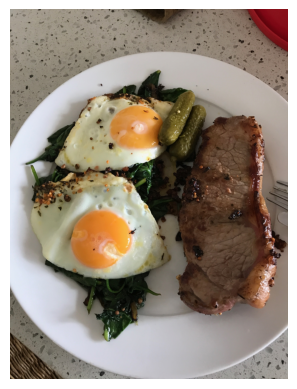

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # glob all directories
print(class_names)

# Classes we're working with
print(class_names)

# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

# Check the shape of our image
print("steak.shape: ",steak.shape)

# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
print("steak: ",steak)
# NB this is 1 image of width x height x RGB but needing an extra dimension of
# 'batch size' (as noted before in wrangling shapes), to have 4 dimensions, to be processable by model.fit

# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
print("steak: ",steak)

Cannot use a binary cross entropy (output will be in probability of )

modified to 512x512? (1, 512, 512, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
pred:  [[0.49896201]]
pizza
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
--2024-11-20 12:01:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2024-11-20 12:01:38 (47.2 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


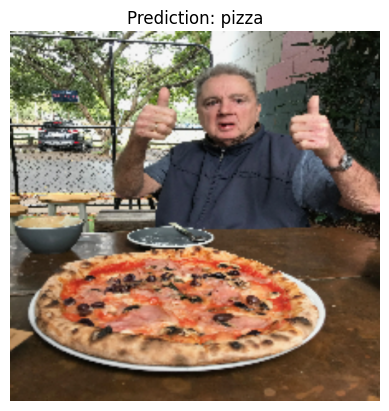

In [ ]:
#pred = model_8.predict(steak)

target_height, target_width= 512, 512
steak2=tf.image.resize(steak,[target_height, target_width])
print("modified to 512x512?", steak2.shape)
# this is really wonky, don't do this in real life!
pred = model_8.predict(steak2)

print("pred: ",pred)

# We can index the predicted class by rounding the prediction probability
# i.e. select from the array of class_names by rounding up [0][0] of the
# prediction, which will be
pred_class = class_names[int(tf.round(pred)[0][0])]
print(pred_class)



# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)



Successful prediction of a pizza in an image (not from training or from testing set).

In [ ]:
# FROM TUTORIAL 3 03_convolutional_neural_networks_in_tensorflow

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

#####################
# MODIFIFED BY PNJ BELOW - WONKILY
  # UH-OH! PJ having to resize back to 512x512 (lousy coding! don't do in real life) to fit his own CNN input layer, shape parameter
  target_height, target_width= 512, 512
  img2=tf.image.resize(img,[target_height, target_width])
#####################

  # Make a prediction
  #pred = model.predict(tf.expand_dims(img, axis=0))
  pred = model.predict(tf.expand_dims(img2, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  #plt.imshow(img)
  plt.imshow(img2)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Now try classification from many sets (pizza from ten others) for real.

First get the data and sort it out ready for use.

The data downloaded will be in the usual directory structure for the ten classes to be identifiable by the built-in routines.

This time (below) i have tried to both (i) resize to 224x224 (??) as per tutorial and (ii) normalise/feature-scale by dividing by 255, as per tutorial and as described in:

# https://chatgpt.com/share/673ded52-e628-8013-9e4b-f5027198c681
# https://stackoverflow.com/a/69813100/11365317

In [ ]:
# download and visualisation of what's in the data

import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()





--2024-11-20 20:56:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.207, 74.125.204.207, 64.233.187.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2024-11-20 20:56:25 (22.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Visualise directory setup of ten classe (of food images - ten types)

import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

ten_train_dir = "10_food_classes_all_data/train/"
ten_test_dir = "10_food_classes_all_data/test/"

# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(ten_train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

Image shape: (512, 384, 3)


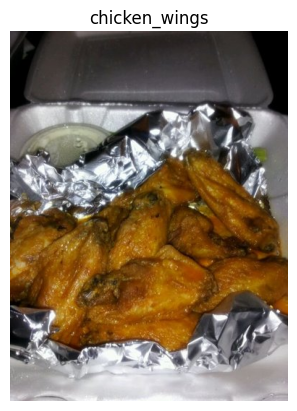

In [ ]:
# Visualise image graphic (randomly)

# View a random image from the training dataset
import random
img = view_random_image(target_dir=ten_train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [ ]:
# process downloaded data - get into variables

"""
# unused ImageDataGenerator code from the tutorial (use Dataset instead)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
"""
# trying to rescale as 224x224 as per tutorial/normal practice
import tensorflow as tf


ten_train_data_dir=ten_train_dir
ten_test_data_dir=ten_test_dir
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 224  # try 224 as per tutorial, instead of 512
img_width = 224

ten_train_ds = tf.keras.utils.image_dataset_from_directory(
  ten_train_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical' # changed to categorical
)

ten_test_ds = tf.keras.utils.image_dataset_from_directory(
  ten_test_data_dir,
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical' # changed to categorical
)


for img, lbl in ten_train_ds.take(3):
  print("Image shape: ", img.numpy().shape)
  print("Label: ", lbl.numpy())

# ten classes (of food image) train/test variables

######################
# this bit on feature-scaling from ChatGPT, done as in tutorials but i'm using Dataset not ImageDataGenerator
normalization_layer = tf.keras.layers.Rescaling(1./255) # normalisation/feature-scaling - divide by 255


# function to be mapped to dataset)
def change_inputs(images, labels):
#def change_inputs(labels, images):
  x = tf.image.resize(normalization_layer(images),[224, 224], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  y = labels  #????   # altered by PNJ, trying to protect label data
  #return x, x
  return x, y   # altered by PNJ, trying to protect label data

normalized_train_ds = ten_train_ds.map(change_inputs) # apply feature-scaling/normalisation to all records
normalized_test_ds = ten_test_ds.map(change_inputs) # apply feature-scaling/normalisation to all test records

# https://chatgpt.com/share/673ded52-e628-8013-9e4b-f5027198c681
# https://stackoverflow.com/a/69813100/11365317

######################

for img, lbl in normalized_train_ds.take(3):
  print("normalised_train_ds image data:")
  print("Image shape: ", img.numpy().shape)
  print("Label: ", lbl.numpy())
  print("img: ", img.numpy())


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Image shape:  (32, 224, 224, 3)
Label:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0

From tutorial: *why is the image size 224x224? This could actually be any size we wanted, however, 224x224 is a very common size for preprocessing images to. Depending on your problem you might want to use larger or smaller images.*

Copy-paste from tutorial.

Next model model_9 is slightly adapted from the binary steak-or-pizza model_8 to multi-class classification (ten classes of foood images) by:
* 10 output neurons to match the 10 classes of image (i.e. ten types of food) in this case (only 1 neuron for binary)
* optimisation loss function in model definition to be,  rather than '*binary_crossentropy*', '*categorical_crossentropy*' because this is multi-class clasification by category (cf now *label_mode='categorical'* in *image_dataset_from_directory*.
* output layer changed from *sigmoid* to *softmax* (i.e. 0-1 float: highest for likeliest) - as per previous tutorial's tables






In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),  # going with tutorial's 224x224 :-o ....
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.1167 - loss: 14.7866 - val_accuracy: 0.1580 - val_loss: 2.2479
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.2807 - loss: 2.0359 - val_accuracy: 0.2412 - val_loss: 2.1681
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 81us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - accuracy: 0.5782 - loss: 1.3076 - val_accuracy: 0.2404 - val_loss: 2.4350
79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 719ms/step - accuracy: 0.2340 - loss: 2.4758


ValueError: x and y must have same first dimension, but have shapes (5,) and (3,)

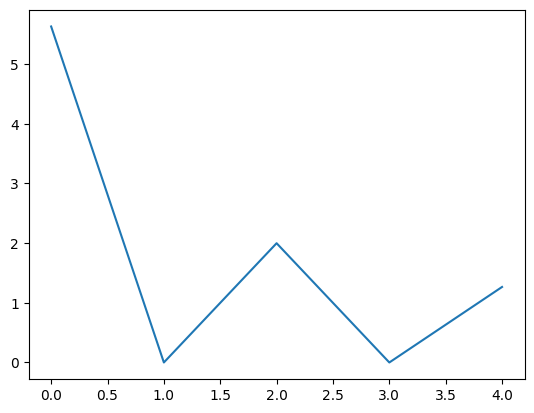

In [ ]:
# Fit the model
history_9 = model_9.fit(ten_train_ds, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(ten_train_ds),
                        validation_data=ten_test_ds,
                        validation_steps=len(ten_test_ds))
model_9.evaluate(ten_test_ds)
plot_CNN_loss_curves(history_9)

Try simplifying the model (from four Conv2D layers down to two) in case of over-fitting having occurred (i.e. static or decreasing accuracy over successive epochs)

In [ ]:
# Try a simplified model (removed two Conv2D layers)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(ten_train_ds,
                          epochs=5,
                          steps_per_epoch=len(ten_train_ds),
                          validation_data=ten_test_ds,
                          validation_steps=len(ten_test_ds))

# Fit the model
model_10.evaluate(ten_test_ds)
plot_CNN_loss_curves(history_10)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.1180 - loss: 86.2569 - val_accuracy: 0.1056 - val_loss: 2.3002
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.2031 - loss: 2.1549 - val_accuracy: 0.1164 - val_loss: 2.3244
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.3673 - loss: 1.8119 - val_accuracy: 0.1404 - val_loss: 2.5046
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 377ms/step - accuracy: 0.1444 - loss: 2.5079


NameError: name 'plot_CNN_loss_curves' is not defined

Fairly terrible reults for model_9 and model_10? (every other epoch missed - run on CPU)

79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 699ms/step - accuracy: 0.1870 - loss: 2.4376
[2.424075126647949, 0.17599999904632568]



79/79 ━━━━━━━━━━━━━━━━━━━━ 33s 414ms/step - accuracy: 0.1270 - loss: 2.4979
[2.4781315326690674, 0.12439999729394913]

(But with normalisation a bit modified from https://stackoverflow.com/a/69813100/11365317 , to try to preserve and not normalise the labels, only the image data (see my code)) for model_9 and model_10


79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 719ms/step - accuracy: 0.2340 - loss: 2.4758

79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 377ms/step - accuracy: 0.1444 - loss: 2.5079

Try again for model_11 but this time using data augmentation on the dataset input, as per with model_6)

In [ ]:
import tensorflow as tf

ten_train_dir = "10_food_classes_all_data/train/"
ten_test_dir = "10_food_classes_all_data/test/"

ten_train_data_dir=ten_train_dir
ten_test_data_dir=ten_test_dir
batch_size = 32
#batch_size = 16 # 16 is half of model.fit default batch size
img_height = 224  # try 224 as per tutorial, instead of 512
img_width = 224

ten_train_ds = tf.keras.utils.image_dataset_from_directory(
  ten_train_data_dir,
  #validation_split=0.2,
  #subset="training",
  # could have training and validation subsets
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical' # changed to categorical
)

ten_test_ds = tf.keras.utils.image_dataset_from_directory(
  ten_test_data_dir,
  seed=67,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical' # changed to categorical
)

# ten classes (of food image) train/test variables

######################
# this bit on feature-scaling from ChatGPT, done as in tutorials but i'm using Dataset not ImageDataGenerator
normalization_layer = tf.keras.layers.Rescaling(1./255) # normalisation/feature-scaling - divide by 255

# function to be mapped to dataset)
def change_inputs(images, labels):
#def change_inputs(labels, images):
  x = tf.image.resize(normalization_layer(images),[224, 224], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  y = labels  #????   # altered by PNJ, trying to protect label data
  #return x, x
  return x, y   # altered by PNJ, trying to protect label data

normalized_train_ds = ten_train_ds.map(change_inputs) # apply feature-scaling/normalisation to all records
normalized_test_ds = ten_test_ds.map(change_inputs) # apply feature-scaling/normalisation to all test records

# https://chatgpt.com/share/673ded52-e628-8013-9e4b-f5027198c681
# https://stackoverflow.com/a/69813100/11365317

######################


import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Set the seed
tf.random.set_seed(67)

image_data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.1),
  RandomZoom(0.2)])

def augment_images(image, label): # cos Dataset will have cussed labels dimension/rank as well as 4 dims of height width RGB and number
  augmented_image = image_data_augmentation(image)  # do stuff on the image part only
  return augmented_image, label # return both image (altered) and label

# https://chatgpt.com/share/673cabe4-4804-8013-b9d3-15f59ab60fdb
ten_augmented_train_ds = ten_train_ds.map(augment_images, num_parallel_calls=tf.data.AUTOTUNE)
# hmmm - map the augmentation function to the dataset (i.e. applies the function to each element in the Dataset)

# Now prefetch for performance
ten_augmented_train_ds = ten_augmented_train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# overlaps processing with training

for img, lbl in ten_augmented_train_ds.take(3):
  print("ten_augmented_train_ds image data:")
  print("Image shape: ", img.numpy().shape)
  print("Label: ", lbl.numpy())
  print("img: ", img.numpy())




Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
ten_augmented_train_ds image data:
Image shape:  (32, 224, 224, 3)
Label:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.

In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(ten_augmented_train_ds, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(ten_augmented_train_ds),
                          validation_data=ten_test_ds,
                          validation_steps=len(ten_test_ds))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.1102 - loss: 166.9961 - val_accuracy: 0.1108 - val_loss: 2.3098
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.1071 - loss: 2.3043 - val_accuracy: 0.1068 - val_loss: 2.3037
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 75us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.1034 - loss: 2.3021 - val_accuracy: 0.1108 - val_loss: 2.3022


Even worse with data augmentation, in model_11!!


79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 476ms/step - accuracy: 0.1141 - loss: 2.3058
[2.306025505065918, 0.10320000350475311]

Try predicting????
Get some data .....
...... and amend the pred_and_plot function to not use my stupid resizing to 512x512 (as done before).

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# FROM TUTORIAL 3 03_convolutional_neural_networks_in_tensorflow

# Adjust function to work with multi-class
def pred_and_plot_original_size(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))


  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
    print("debug: Multi-class prediction")
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  #plt.imshow(img)
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Make a prediction using model_11
pred_and_plot_original_size(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

NameError: name 'class_names' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
debug: Multi-class prediction


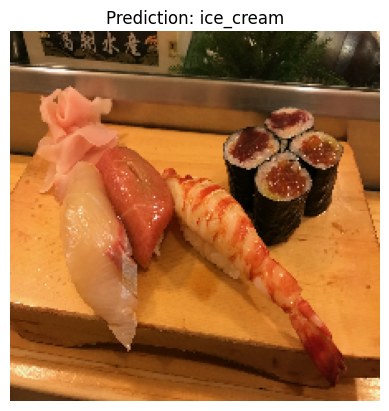

In [ ]:
pred_and_plot_original_size(model_11, "03-sushi.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
debug: Multi-class prediction


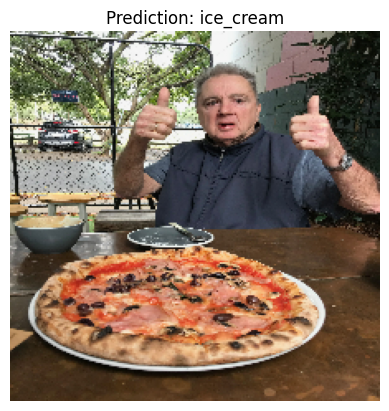

In [ ]:
pred_and_plot_original_size(model_11, "03-pizza-dad.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
debug: Multi-class prediction


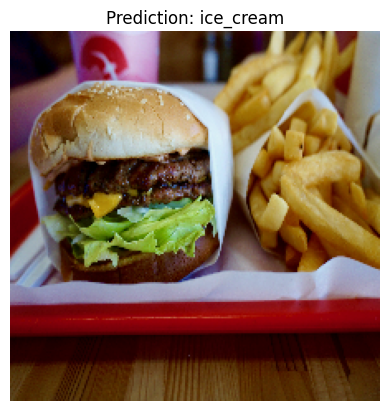

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [ ]:
#  Hmmm well anyway

Pretty awful results, maybe try these without shrinking the ten-class food image data down to 224x224?